In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch
import torch.nn as nn
sns.set(rc={'figure.figsize':(12,8)})

In [0]:
df = pd.read_csv('new_york_citi_bike.csv')

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,327,00:02.0,05:29.3,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,1145,00:04.1,19:09.8,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,1293,00:07.3,21:40.8,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0
3,1753,00:08.1,29:21.5,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1
4,613,00:12.9,10:26.2,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
tripduration               1048575 non-null int64
starttime                  1048575 non-null object
stoptime                   1048575 non-null object
start station id           1048575 non-null int64
start station name         1048575 non-null object
start station latitude     1048575 non-null float64
start station longitude    1048575 non-null float64
end station id             1048575 non-null int64
end station name           1048575 non-null object
end station latitude       1048575 non-null float64
end station longitude      1048575 non-null float64
bikeid                     1048575 non-null int64
usertype                   1048575 non-null object
birth year                 1048575 non-null int64
gender                     1048575 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 120.0+ MB


In [0]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.008363e+03,1.654709e+03,4.073735e+01,-7.398213e+01,1.648128e+03,4.073698e+01,-7.398234e+01,2.961550e+04,1.980670e+03,1.167502e+00
std,1.107315e+04,1.481409e+03,3.024812e-02,2.016519e-02,1.481127e+03,3.014928e-02,2.023096e-02,7.699267e+03,1.210761e+01,5.571929e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.404282e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.860000e+02,3.770000e+02,4.071755e+01,-7.399596e+01,3.760000e+02,4.071749e+01,-7.399662e+01,2.508500e+04,1.970000e+03,1.000000e+00
50%,6.570000e+02,5.080000e+02,4.073705e+01,-7.398584e+01,5.070000e+02,4.073653e+01,-7.398627e+01,3.078300e+04,1.983000e+03,1.000000e+00
75%,1.139000e+03,3.295000e+03,4.075725e+01,-7.397121e+01,3.295000e+03,4.075680e+01,-7.397121e+01,3.526100e+04,1.990000e+03,2.000000e+00
max,2.904620e+06,3.811000e+03,4.081439e+01,-7.390774e+01,3.811000e+03,4.081439e+01,-7.390774e+01,4.097200e+04,2.003000e+03,2.000000e+00


In [0]:
df['start station name'].nunique()

791

## Data Cleaning

In [0]:
df.shape

(1048575, 15)

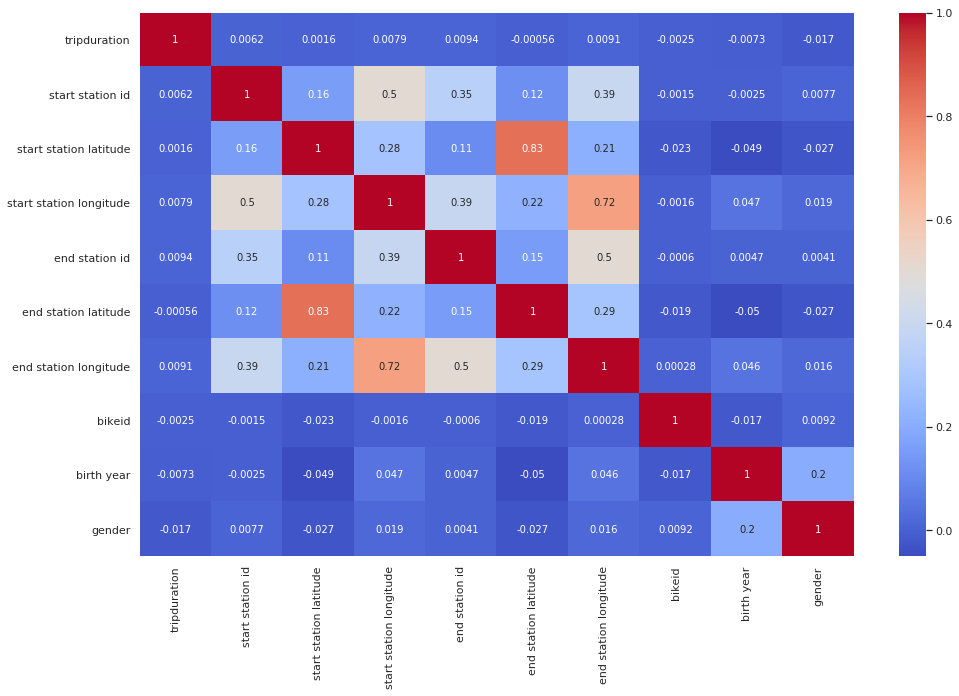

In [0]:
feat_corr = df.corr()

plt.figure( figsize = (16,10))
sns.heatmap(feat_corr, cmap = 'coolwarm',annot = True)

In [0]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

<font color = 'green' size = '3'><b> Here, we have checked the number of missing values in the dataset. It seems that there are no missing values associated with this dataset.

In [0]:
duplicate_df = df[df.duplicated()]
print('Duplicate Rows: ', duplicate_df.shape[0])

Duplicate Rows:  0


In [0]:
df['starttime'] = df['starttime'].str.replace('.',':')
df['stoptime'] = df['stoptime'].str.replace('.',':')

<font color = 'green' size = '3'><b> Since the starttime and stoptime features where not in proper datetime format, we modified the values to convert it to the datetime format.

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,327,00:02:0,05:29:3,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,1145,00:04:1,19:09:8,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,1293,00:07:3,21:40:8,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0
3,1753,00:08:1,29:21:5,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1
4,613,00:12:9,10:26:2,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1


In [0]:
df['starttime'] = pd.to_timedelta(df['starttime'])
df['stoptime'] = pd.to_timedelta(df['stoptime'])

In [0]:
df['stoptime'] = pd.to_timedelta(df['stoptime'])-pd.to_timedelta(df['stoptime'].dt.days, unit = 'd')

<font color = 'green' size = '3'><b>Using pandas's inbuilt function to_timedelta, we are converting the starttime and stoptime features into datetime format.

In [0]:
#df['starttime'] = pd.to_datetime(df['starttime'])
#df['stoptime'] = pd.to_datetime(df['stoptime'])
df['start station name'] = df['start station name'].astype('category')
df['end station name'] = df['end station name'].astype('category')
df['usertype'] = df['usertype'].astype('category')
df['gender'] = df['gender'].astype('category')

<font color = 'green' size = '3'><b> For the purpose of Exploratory Data Analysis, we will converting the station names, usertype and gender to categorical variables.

In [0]:
df['tripduration'] = df['tripduration']/60

<font color = 'green' size = '3'><b> For convenience, we will be converting tripduration from seconds to minutes and round off to 3 decimal places.<br>
   

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,5.450000,00:02:00,05:29:03,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,19.083333,00:04:01,19:09:08,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,21.550000,00:07:03,21:40:08,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0
3,29.216667,00:08:01,05:21:05,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1
4,10.216667,00:12:09,10:26:02,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1


In [0]:
df['tripduration'] = df['tripduration'].round(3)

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,5.450,00:02:00,05:29:03,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,19.083,00:04:01,19:09:08,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,21.550,00:07:03,21:40:08,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0
3,29.217,00:08:01,05:21:05,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1
4,10.217,00:12:09,10:26:02,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1


<font color = 'green' size = '3'><b> We will be checking if the latitude and longitude values conform to the standard values  - (Latitude = -90 to +90, Longitude = -180 to +180).<br>

In [0]:
df['start station latitude'].describe()

count    1.048575e+06
mean     4.073735e+01
std      3.024812e-02
min      4.065540e+01
25%      4.071755e+01
50%      4.073705e+01
75%      4.075725e+01
max      4.081439e+01
Name: start station latitude, dtype: float64

In [0]:
df['end station latitude'].describe()

count    1.048575e+06
mean     4.073698e+01
std      3.014928e-02
min      4.065540e+01
25%      4.071749e+01
50%      4.073653e+01
75%      4.075680e+01
max      4.081439e+01
Name: end station latitude, dtype: float64

In [0]:
df['start station longitude'].describe()

count    1.048575e+06
mean    -7.398213e+01
std      2.016519e-02
min     -7.402535e+01
25%     -7.399596e+01
50%     -7.398584e+01
75%     -7.397121e+01
max     -7.390774e+01
Name: start station longitude, dtype: float64

In [0]:
df['end station longitude'].describe()

count    1.048575e+06
mean    -7.398234e+01
std      2.023096e-02
min     -7.404282e+01
25%     -7.399662e+01
50%     -7.398627e+01
75%     -7.397121e+01
max     -7.390774e+01
Name: end station longitude, dtype: float64

In [0]:
start_lat = np.where((df['start station latitude']< -90) | (df['start station latitude'] > 90))

In [0]:
start_lat

(array([], dtype=int64),)

In [0]:
start_long = np.where((df['start station longitude']< -180) | (df['start station longitude'] > 180))

In [0]:
start_long

(array([], dtype=int64),)

In [0]:
end_lat = np.where((df['end station latitude']< -90) | (df['end station latitude'] > 90))

In [0]:
end_lat

(array([], dtype=int64),)

In [0]:
end_long = np.where((df['end station longitude']< -180) | (df['end station longitude'] > 180))

In [0]:
end_long

(array([], dtype=int64),)

<font color = 'green' size = '3'><b>Considering the city of New York, we have to keep in mind the longitude and latitude boundaries of the city. After some domain research, we found out that,<br>

<b>Longitude Boundary - (-74.03, -73.75)</b><br>


<b>Latitude Boundary - (40.63, 40.85)</b><br>
    
Hence, we need to remove values outside this boundary.

In [0]:
nyc_boundary = {'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [0]:
outside_nyc = np.where(~((df['start station longitude'] >= nyc_boundary['min_lng'] ) & (df['start station longitude'] <= nyc_boundary['max_lng']) &
            (df['start station latitude'] >= nyc_boundary['min_lat']) & (df['start station latitude'] <= nyc_boundary['max_lat']) &
            (df['end station longitude'] >= nyc_boundary['min_lng']) & (df['end station longitude'] <= nyc_boundary['max_lng']) &
            (df['end station latitude'] >=nyc_boundary['min_lat']) & (df['end station latitude'] <= nyc_boundary['max_lat'])))

In [0]:
outside_nyc

(array([], dtype=int64),)

### Haversine Distance

<font color = 'green' size = '3'><b> Haversine distance calculates the distance between two locations based on the latitude and longitude values.<br>

In [0]:
def distance(lat1, long1, lat2, long2):
    data = [df]
    for i in data:
        R = 6371 #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        d = (R * c)
        i['trip_distance'] = d
    return d

In [0]:
distance('start station latitude', 'start station longitude', 'end station latitude','end station longitude')

0          0.672115
1          2.128793
2          2.554454
3          2.090950
4          1.791288
             ...   
1048570    4.621949
1048571    1.710085
1048572    0.944970
1048573    0.549538
1048574    3.731949
Length: 1048575, dtype: float64

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_distance
0,5.450,00:02:00,05:29:03,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1,0.672115
1,19.083,00:04:01,19:09:08,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0,2.128793
2,21.550,00:07:03,21:40:08,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0,2.554454
3,29.217,00:08:01,05:21:05,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1,2.090950
4,10.217,00:12:09,10:26:02,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1,1.791288


In [0]:
from datetime import datetime
now = datetime.now()
df["age"] =  now.year - df["birth year"]

<font color = 'green' size = '3'><b>From the birth year column we featured engineered the column name "age" for further analysis on the age group using the datetime library.

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_distance,age
0,5.450,00:02:00,05:29:03,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1,0.672115,51
1,19.083,00:04:01,19:09:08,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0,2.128793,50
2,21.550,00:07:03,21:40:08,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0,2.554454,50
3,29.217,00:08:01,05:21:05,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1,2.090950,29
4,10.217,00:12:09,10:26:02,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1,1.791288,27


<font color = 'green' size = '3'><b> We have created a dictionary for the 5 boroughs of New York, namely - Manhattan, Queens, Brooklyn, Bronx and Staten Island, with their boundary coordinates.<br>

In [0]:
nyc_boroughs = {
    
        'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490

    }
    
}

In [0]:
def borough(lat,long):
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and long>=nyc_boroughs[loc]['min_lng'] and long<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [0]:
df['pickup_borough'] = df.apply(lambda row : borough(row['start station latitude'],row['start station longitude']), axis = 1)

In [0]:
df['dropoff_borough'] = df.apply(lambda row : borough(row['end station latitude'],row['end station longitude']), axis = 1)

<font color = 'green' size = '3'><b> We have created a function to get the latitude and longitude values and then map to the corresponding boroughs as per the boundary coordinates.<br>

## Exploratory Data Analysis

<font color = 'green' size = '3'><b> 1. Which are Top 5 Bike Stations by Number of Starts?

In [0]:
top5 = pd.DataFrame() 
top5['Station']=df['start station name'].value_counts().head().index
top5['Number of Starts']=df['start station name'].value_counts().head().values
top5['Station'] = top5['Station'].cat.remove_unused_categories()
top5['Station'] = top5['Station'].astype('object')

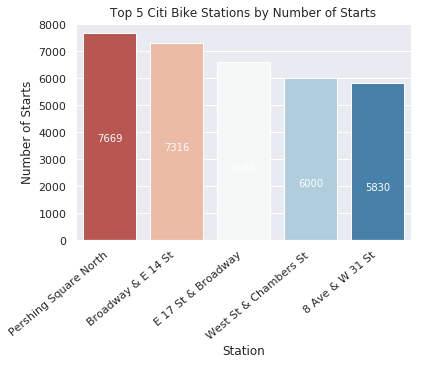

In [0]:
ax = sns.barplot('Station', 'Number of Starts', data = top5, palette="RdBu")
ax.set_title('Top 5 Citi Bike Stations by Number of Starts', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top5.iterrows():
    ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show()

<font color = 'green' size = '3'><b> From the above plot, we can determine that Pershing Square North is the highest used start station.

In [0]:
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster

In [0]:
Top5 = pd.DataFrame({
'lat':[40.7520,40.7348005,40.7171,40.7181203,40.7502803],
'lon':[-73.9778,-73.9929213,-74.0126,-74.0215772,-73.9970209]}
)
name = ['Pershing Square North', 'Broadway & E 14 St','West St & Chambers St','E 17 St & Broadway','8 Ave & W 31 St']
location = pd.DataFrame({'name': name
})
Top5_list = Top5.values.tolist()
m = folium.Map(location = (40.750996996,-73.973162774), zoom_start = 10)

for i in range(0, len(Top5_list)):
    folium.Marker(Top5_list[i], popup = location['name'][i]).add_to(m)

m

<font color = 'green' size = '3'><b> 2. Which are the Most Popular Trips?</font>

In [0]:
trips_df = pd.DataFrame()
trips_df = df.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df["start station name"] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Trip"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['start station name', "end station name"], axis = 1)
trips_df = trips_df.reset_index()
#trips_df.head()

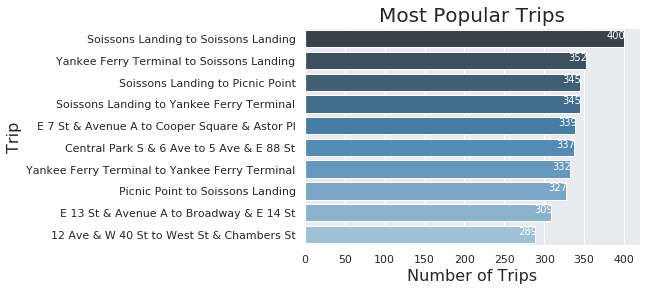

In [0]:
ax4 = sns.barplot('Number of Trips','Trip', data = trips_df,palette="Blues_d")
ax4.set_title('Most Popular Trips', fontsize = 20)
ax4.set_ylabel("Trip",fontsize=16)
ax4.set_xlabel("Number of Trips",fontsize=16)
for index, row in trips_df.iterrows():
    ax4.text(row['Number of Trips']-10,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()

<font color = 'green' size = '3'><b>3. Which borough has the highest service usage?

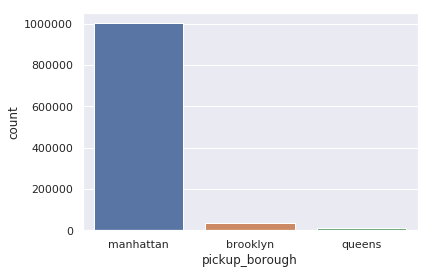

In [0]:
sns.countplot(df['pickup_borough'])

<font color = 'green' size = '3'><b> From the above plot, we see that <b> Manhattan </b> has the highest service usage.

<font color = 'green' size = '3'><b>4. How long are most of the users travelling?

<font color = 'green' size = '3'><b> We have binned the trip duration to - Normal trips(0-30 mins),Extended Trips(31 - 60 mins) and Long trips(61-max).<br>

In [0]:
bins = [df['tripduration'].min(),30,60,df['tripduration'].max()]
labels=['Normal trips','Extended Trips','Long Trips']
df['trip_duration_type'] = pd.cut(df.age,bins,labels=labels)

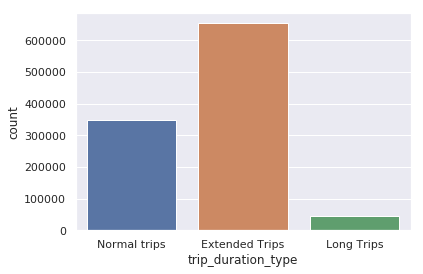

In [0]:
sns.countplot(df['trip_duration_type'])

<font color = 'green' size = '3'><b>Based on the above plot, we have <b>Extended trips</b> as the highest usage.<br>

<font color = 'green' size = '3'><b>5. Which gender uses the service adequately?

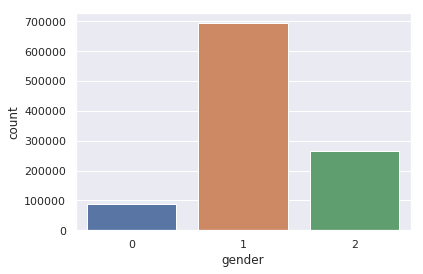

In [0]:
sns.countplot(df['gender'])

<font color = 'green' size = '3'>From the above plot it can be seen that <b>"Male"</b> use the service more adequately

<font color = 'green' size = '3'><b>6. Which age group has highest usage?

In [0]:
bins = [df['age'].min(),30,45,df['age'].max()]

labels=['Young Adults','Middle Aged Adults','Old Adults']
df['age_group'] = pd.cut(df.age,bins,labels=labels)

<font color = 'green' size = '3'><b>To analyze the highest usage based on age groups, we have binned the featured engineered column "age" into three sub-age groups namely: between min age to 30 as Young Adults, between 31 to 45 as Middle Age Adults and between 46 to max-age as Old Adults.

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,trip_distance,age,pickup_borough,dropoff_borough,trip_duration_type,age_group
0,5.450,00:02:00,05:29:03,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,...,39213,Subscriber,1968,1,0.672115,51,manhattan,manhattan,Extended Trips,Old Adults
1,19.083,00:04:01,19:09:08,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,...,21257,Customer,1969,0,2.128793,50,manhattan,manhattan,Extended Trips,Old Adults
2,21.550,00:07:03,21:40:08,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,...,15242,Customer,1969,0,2.554454,50,manhattan,manhattan,Extended Trips,Old Adults
3,29.217,00:08:01,05:21:05,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,...,38760,Subscriber,1990,1,2.090950,29,manhattan,manhattan,Normal trips,Young Adults
4,10.217,00:12:09,10:26:02,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,...,32094,Subscriber,1992,1,1.791288,27,manhattan,manhattan,Normal trips,Young Adults


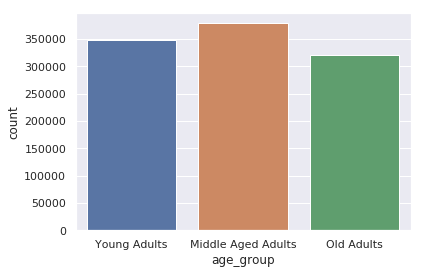

In [0]:
sns.countplot(df['age_group'])

<font color = 'green' size = '3'><b>From the above plot it can be seen that the <b>Middle aged adults</b> have the highest usage of the bikeshare service 

<font color = 'green' size = '3'><b>7. What is the average Trip Duration based on User Type (with anomalies)?<br>

In [0]:
TD_user = pd.DataFrame()
TD_user['avg trip duration'] = round(df.groupby('usertype')['tripduration'].mean(),2)
TD_user = TD_user.reset_index()
TD_user['usertype'] = TD_user['usertype'].astype('object')

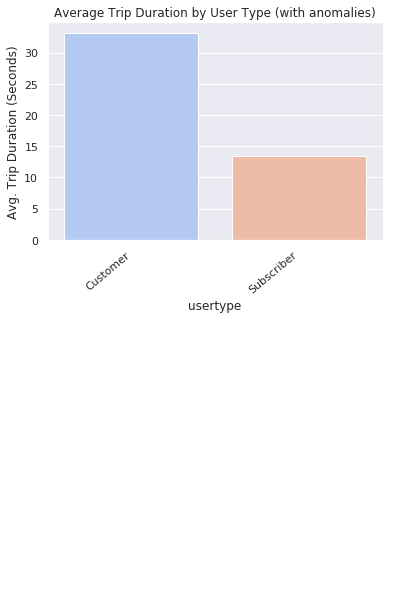

In [0]:
ax2 = sns.barplot('usertype', 'avg trip duration', data = TD_user,palette="coolwarm")
ax2.set_title('Average Trip Duration by User Type (with anomalies)')
#rcParams['figure.figsize'] = 12,7
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40, ha = 'right')
ax2.set_ylabel('Avg. Trip Duration (Seconds)')
for index, row in TD_user.iterrows():
    ax2.text(index,row['avg trip duration']-70,(str(row['avg trip duration'])+"  Seconds"), 
             color='white', ha="center", fontsize = 10)
plt.show()

<font color = 'green' size = '3'><b>8. Which type of users has high trip duration?

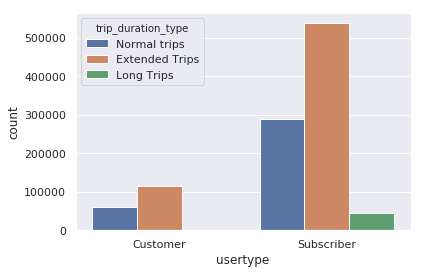

In [0]:
sns.countplot(df['usertype'], hue = df['trip_duration_type'])

<font color = 'green' size = '3'> <b>Subscriber</b> has the highest trip duration.

### MACHINE LEARNING

In [0]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'trip_distance', 'age', 'pickup_borough',
       'dropoff_borough', 'trip_duration_type', 'age_group'],
      dtype='object')

In [0]:
col = ['tripduration','start station latitude','start station longitude','end station latitude', 'end station longitude']

X = df[col]
y = df['usertype']

## PIPELINING ENSEMBLE LEARNING

In [0]:
cart_clf = DecisionTreeClassifier()
rand_clf = RandomForestClassifier(n_estimators=100)
bag_clf = BaggingClassifier(base_estimator=cart_clf)
ada_clf = AdaBoostClassifier(n_estimators=100)
grad_clf = GradientBoostingClassifier(learning_rate = 0.01)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
classifiers = [
    RandomForestClassifier(300),
    DecisionTreeClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]
for clf in classifiers:
    steps = [('clf', clf)]
    pipeline = Pipeline(steps)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print(results.mean())

0.8452566086606081


In [0]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            presort='auto', random_state=None,
                                            subsample=1.0, tol=0.0001,
                              

In [0]:
predictions = pipeline.predict(X_test)

In [0]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Customer       0.72      0.14      0.23     44094
  Subscriber       0.85      0.99      0.91    218050

    accuracy                           0.85    262144
   macro avg       0.78      0.56      0.57    262144
weighted avg       0.83      0.85      0.80    262144



In [0]:
print(confusion_matrix(y_test, predictions))

[[  6047  38047]
 [  2400 215650]]


In [0]:
print(accuracy_score(y_test, predictions))

0.8457069396972656


## ARTIFICIAL NEURAL NETWORK

In [0]:
cont_cols = ['tripduration','start station latitude','start station longitude','end station latitude','end station longitude', 'trip_distance']
y_cols = ['usertype']

In [0]:
cont = np.stack([df[col].values for col in cont_cols], axis = 1)

In [0]:
X = torch.tensor(cont, dtype = torch.float)

In [0]:
df['usertype'] = df['usertype'].astype('category')

In [63]:
df['usertype'].head()

0    Subscriber
1      Customer
2      Customer
3    Subscriber
4    Subscriber
Name: usertype, dtype: category
Categories (2, object): [Customer, Subscriber]

In [0]:
y_col = np.stack([df['usertype'].cat.codes.values], axis = 1).reshape(-1,1)

In [65]:
y_col

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int8)

In [0]:
y = torch.tensor(y_col, dtype = torch.int64)

In [67]:
y

tensor([[1],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]])

In [0]:
class TabularModel(nn.Module):

  def __init__(self, n_cont,out_size,layers,p):

    super().__init__()

    self.emb_drop = nn.Dropout(p)
    self.cont_norm = nn.BatchNorm1d(n_cont)

    layerlist = []

    for i in layers:
      layerlist.append(nn.Linear(n_cont,i))
      layerlist.append(nn.ReLU(inplace = True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_cont = i
    
    layerlist.append(nn.Linear(layers[-1], out_size))

    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cont):

    x_cont = self.emb_drop(x_cont)
    x_cont = self.cont_norm(x_cont)
    x_cont = self.layers(x_cont)
    return x_cont

In [0]:
model = TabularModel(X.shape[1], 2, [200,100,100,64], p = 0.4)

In [70]:
model

TabularModel(
  (emb_drop): Dropout(p=0.4, inplace=False)
  (cont_norm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=64, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [0]:
batch_size = 1048575
test_size = int(batch_size * .2)

X_train = X[:batch_size-test_size]
X_test = X[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [73]:
import time
start_time = time.time()

epochs = 150
losses = []

for i in range(epochs):
  i+=1

  y_pred = model(X_train)
  y_train = y_train.squeeze_()
  loss = criterion(y_pred, y_train)
  losses.append(loss)

  if i%25 == 1:
    print(f'epoch: {i:3} loss: {loss.item():10.8f}')

  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(f'epoch: {i:3} loss: {loss.item():10.8f}')
print(f'\n Duration: {time.time() - start_time:.0f} seconds')

epoch:   1 loss: 0.77336037
epoch:  26 loss: 0.46679673
epoch:  51 loss: 0.43603057
epoch:  76 loss: 0.42564711
epoch: 101 loss: 0.42119685
epoch: 126 loss: 0.41933882
epoch: 150 loss: 0.41754082

 Duration: 12420 seconds


In [80]:
with torch.no_grad():
  y_val = model(X_test)
  y_test = y_test.squeeze(1)
  loss = criterion(y_val, y_test)
print(f'Cross Entropy Loss: {loss: .8f}')

Cross Entropy Loss:  0.42420015


In [84]:
rows = 100
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
  print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
  if y_val[i].argmax().item() == y_test[i]:
    correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([-0.7935,  0.8976])    1      1   
tensor([-1.6111,  1.4376])    1      1   
tensor([-0.9953,  0.7736])    1      1   
tensor([-0.9668,  0.7237])    1      1   
tensor([-1.6302,  1.0453])    1      1   
tensor([-1.2865,  0.4181])    1      1   
tensor([-1.1439,  0.5965])    1      1   
tensor([-1.2192,  0.0680])    1      1   
tensor([-1.0351,  0.7883])    1      1   
tensor([-0.6283,  0.5460])    1      1   
tensor([-0.9474,  0.8919])    1      1   
tensor([-2.3113,  1.7767])    1      1   
tensor([-1.4688,  0.7036])    1      1   
tensor([-1.1784,  0.8295])    1      1   
tensor([-0.9473,  0.6267])    1      1   
tensor([-1.2349,  1.4307])    1      1   
tensor([-1.2082,  0.8768])    1      1   
tensor([-0.7176,  0.4895])    1      0   
tensor([-0.6965,  0.6235])    1      1   
tensor([-0.9857,  0.7418])    1      1   
tensor([-1.2438,  0.7527])    1      1   
tensor([-1.8809,  1.1945])    1      1   
tensor([-1.5376,  1.0590])    1   

### SAVING THE MODEL

In [0]:
if len(losses) == epochs:
  torch.save(model.state_dict(), 'Bikeshare.pt')
else:
  print('Model is not trained.')

In [0]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
  def __init__(self, n_cont, out_sz, layers, p):

    super().__init__()
    self.emb_drop = nn.Dropout(p)
    self.cont_norm = nn.BatchNorm1d(n_cont)
    layerlist = []

    for i in layers:
      layerlist.append(nn.Linear(n_cont,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_cont = i
    layerlist.append(nn.Linear(layers[-1],out_sz))
    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cont):
    x_cont = self.emb_drop(x_cont)
    x_cont = self.cont_norm(x_cont)
    x_cont = self.layers(x_cont)
    return x_cont

In [0]:
new_model = TabularModel(6,2,[200,100,100,64], p = 0.4)

In [137]:
new_model.load_state_dict(torch.load('Bikeshare.pt'))
new_model.eval()

TabularModel(
  (emb_drop): Dropout(p=0.4, inplace=False)
  (cont_norm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=64, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [0]:
def test_data(mdl): # pass in the name of the new model
   # INPUT NEW DATA
   trip_duration = float(input('What is the trip duration '))
   plat = float(input('What is the pickup latitude?  '))
   plong = float(input('What is the pickup longitude? '))
   dlat = float(input('What is the dropoff latitude?  '))
   dlong = float(input('What is the dropoff longitude? '))
   
   # PREPROCESS THE DATA
   dfx_dict = {'trip_duration':trip_duration,'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
        'dropoff_longitude':dlong}
   dfx = pd.DataFrame(dfx_dict, index=[0])
   dfx['trip_distance'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                       'dropoff_latitude', 'dropoff_longitude')
   
   cont_cols = ['trip_duration','pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                'dropoff_longitude', 'trip_distance']
   xconts = np.stack([dfx[col].values for col in cont_cols], 1)
   xconts = torch.tensor(xconts, dtype=torch.float)
   
   # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
   with torch.no_grad():
       z = mdl(xconts).argmax().item()
   print(f'\nThe Predicted User Type is {z}')

In [142]:
test_data(new_model)

What is the trip duration 1293
What is the pickup latitude?  40.784727
What is the pickup longitude? -73.969617
What is the dropoff latitude?  40.765849
What is the dropoff longitude? -73.986905

The Predicted User Type is 1
